In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
data=pd.read_csv('spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data=data.rename(columns={'v1':'label','v2':'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
data.describe().transpose()

,count,unique,top,freq
label,5572,2,ham,4825
text,5572,5169,"Sorry, I'll call later",30


In [7]:
data['length']=data['text'].apply(len)
data.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

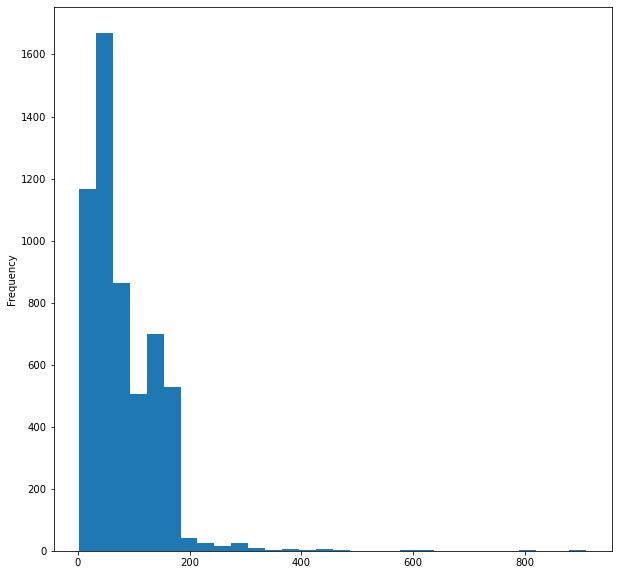

In [8]:
data['length'].plot(bins=30,kind='hist',figsize=(10,10))

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

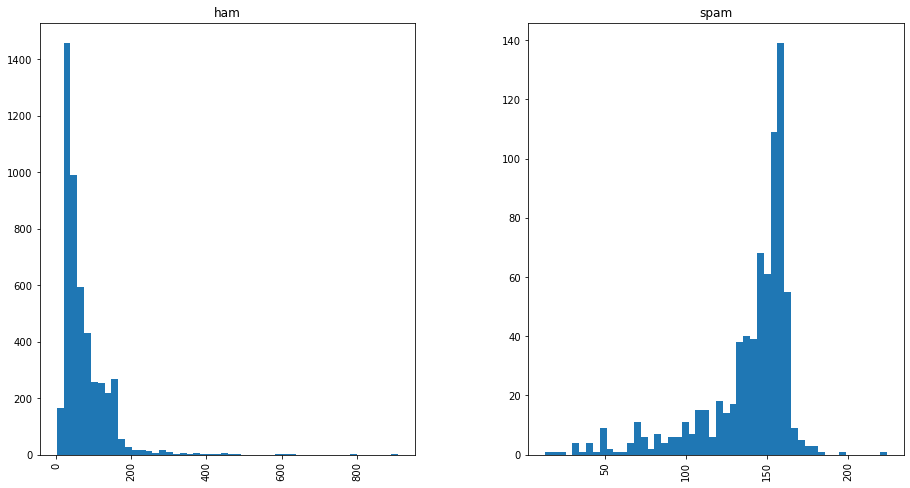

In [9]:
data.hist(column='length',by='label',bins=50,figsize=(15,8))

In [10]:
data.loc[:,'label']=data.label.map({'ham':0,'spam':1})
data.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split as tts
count=CountVectorizer()
input=['Dear Voucher Holder, To claim this weeks offer, at you PC please go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply. To stop texts, txt STOP to 80062']
text=count.fit_transform(data['text'],input)
x_train,x_test,y_train,y_test=tts(text,data['label'],test_size=0.20,random_state=1)

In [48]:
print(x_train.shape)
print(x_test.shape)
input=text[5571]
input

(4457, 8672)
(1115, 8672)


<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.naive_bayes import MultinomialNB


model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [14]:
pred=model.predict(x_test)

In [15]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy Score:{}'.format(accuracy_score(y_test,pred)))
print('Precision Score:{}'.format(precision_score(y_test,pred)))
print('Recall Score:{}'.format(recall_score(y_test,pred)))
print('F1 Score:{}'.format(f1_score(y_test,pred)))

Accuracy Score:0.97847533632287
Precision Score:0.891156462585034
Recall Score:0.9424460431654677
F1 Score:0.9160839160839161


In [17]:
from sklearn.naive_bayes import BernoulliNB


model=BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB()

In [18]:
pred=model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy Score:{}'.format(accuracy_score(y_test,pred)))
print('Precision Score:{}'.format(precision_score(y_test,pred)))
print('Recall Score:{}'.format(recall_score(y_test,pred)))
print('F1 Score:{}'.format(f1_score(y_test,pred)))

Accuracy Score:0.9865470852017937
Precision Score:0.984375
Recall Score:0.9064748201438849
F1 Score:0.9438202247191011


In [20]:
from sklearn.neural_network import MLPClassifier


model=MLPClassifier()
model.fit(x_train,y_train)

MLPClassifier()

In [21]:
pred=model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("MLP Classifier")
print('Accuracy Score:{}'.format(accuracy_score(y_test,pred)))
print('Precision Score:{}'.format(precision_score(y_test,pred)))
print('Recall Score:{}'.format(recall_score(y_test,pred)))
print('F1 Score:{}'.format(f1_score(y_test,pred)))

MLP Classifier
Accuracy Score:0.9937219730941704
Precision Score:1.0
Recall Score:0.9496402877697842
F1 Score:0.974169741697417


In [46]:

input

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [49]:
model.predict(input)

array([0], dtype=int64)

In [88]:
df=data['text']
input='Dear Voucher Holder, To claim this weeks offer, at you PC please go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply. To stop texts, txt STOP to 80062'

In [89]:
df.loc[len(data.index)]='Dear Voucher Holder , to claim our week offer please call us '


In [90]:
df

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572    Dear Voucher Holder , to claim our week offer ...
Name: text, Length: 5573, dtype: object

In [91]:
text=count.fit_transform(df)

In [92]:
text

<5573x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73927 stored elements in Compressed Sparse Row format>

In [93]:
model.predict(text[-1])

array([1], dtype=int64)